## Decision Trees
- Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multi output tasks. 
    - They are powerful algorithms, capable of fitting complex datasets.
- Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.

### Training and Visualizing a Decision Tree
- To understand Decision Trees, let’s build one and take a look at how it makes predictions. 
    - The following code trains a DecisionTreeClassifier on the iris dataset

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
iris.keys()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

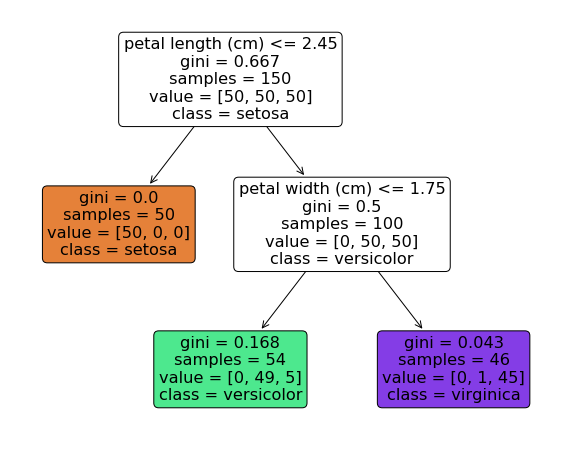

In [4]:
plt.figure(figsize=(10,8))
tree.plot_tree(tree_clf, class_names=iris.target_names, feature_names=iris.feature_names[2:], 
              rounded=True, filled=True,)
plt.show()

### Making Predictions
Let’s see how the tree represented above makes predictions. 
- Suppose you find an iris flower and you want to classify it. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. 
    - If it is, then you move down to the root’s left child node (depth 1, left). 
    - In this case, it is a leaf node (i.e., it does not have any child nodes), so it does not ask any questions: simply look at the predicted class for that node, and the Decision Tree predicts that your flower is an Iris setosa (class=setosa).
- Now suppose you find another flower, and this time the petal length is greater than 2.45 cm.
    - You must move down to the root’s right child node (depth 1, right), which is not a leaf node, so the node asks another question: is the petal width smaller than 1.75 cm? 
    - If it is, then your flower is most likely an Iris versicolor (depth 2, left). If not, it is likely an Iris virginica (depth 2, right). It’s really that simple.

### NOTE
One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all.

- A node’s **samples** attribute counts how many training instances it applies to. 
    - For example, 100 training instances have a petal length greater than 2.45 cm (depth 1, right), and of those 100, 54 have a petal width smaller than 1.75 cm (depth 2, left). 
- A node’s **value** attribute tells you how many training instances of each class this node applies to: for example, the bottom-right node applies to **0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica.** 
- Finally, a node’s gini attribute measures its impurity: **a node is “pure” (gini=0) if all training instances it applies to belong to the same class.** 
    - For example, since the depth-1 left node applies only to Iris setosa training instances, it is pure and its gini score is 0.

### NOTE
Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

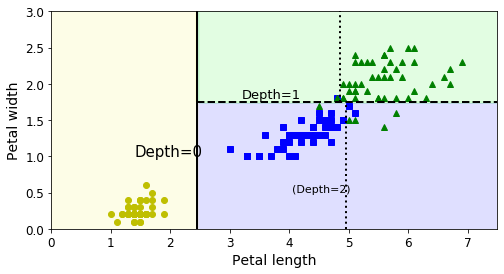

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## Estimating Class Probabilities
- A Decision Tree can also estimate the probability that an instance belongs to a particular class k. 
- First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. 
- For example, suppose you have found a flower whose **petals are 5 cm long and 1.5 cm wide.** 
    - The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: **0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54).**
    - And if you ask it to predict the class, it should output **Iris versicolor (class 1) because it has the highest probability.**
    - Let’s check this:

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

## The CART Training Algorithm
- Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees). 
- The algorithm works by first splitting the training set into two subsets using a single feature k and a threshold tk (e.g., “petal length ≤ 2.45 cm”). 
- How does it choose k and tk ? It searches for the pair (k, tk ) that produces the purest subsets (weighted by their size).
- Equation 6-2 gives the cost function that the algorithm tries to minimize.

<img src="cart.png">

- Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. 
- **It stops recursing once it reaches the maximum depth** (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity. 
- A few other hyperparameters control additional stopping conditions (min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes).
### WARNING
- As you can see, the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each subsequent level. 
- It does not check whether or not the split will lead to the lowest possible impurity several levels down. 
- A greedy algorithm often produces a solution that’s reasonably good but not guaranteed to be optimal.
- Unfortunately, finding the optimal tree is known to be an NP-Complete problem: it requires O(exp(m)) time, making the problem intractable even for small training sets. 
- This is why we must settle for a “reasonably good” solution.

## Computational Complexity
- Making predictions requires traversing the Decision Tree from the root to a leaf. 
- Decision Trees generally are approximately balanced, so traversing the Decision Tree requires going through roughly O(log2(m)) nodes.
- Since each node only requires checking the value of one feature, the overall prediction complexity is O(log2(m)), independent of the number of features.
- So predictions are very fast, even when dealing with large training sets.
- The training algorithm compares all features (or less if max_features is set) on all samples at each node. 
- Comparing all features on all samples at each node results in a training complexity of O(n × m log2(m)).
- For small training sets (less than a few thousand instances), Scikit-Learn can speed up training by presorting the data (set presort=True), but doing that slows down training considerably for larger training sets.

## Gini Impurity or Entropy?
- By default, the Gini impurity measure is used, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy".
- The concept of entropy originated in thermodynamics as a measure of molecular disorder: entropy approaches zero when molecules are still and well ordered. 
    - Entropy later spread to a wide variety of domains, including Shannon’s information theory, where it measures the average information content of a message: entropy is zero when all messages are identical. 
    - In Machine Learning, entropy is frequently used as an impurity measure: **a set’s entropy is zero when it contains instances of only one class.**
- So, should you use Gini impurity or entropy? 
    - The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. 
    - However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

## Regularization Hyperparameters
- Decision Trees make very few assumptions about the training data (as opposed to linear models, which assume that the data is linear, for example). 
- If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely—indeed, most likely overfitting it. 
- Such a model is often called a nonparametric model, not because it does not have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data.
- In contrast, a parametric model, such as a linear model, has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).
- To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. 
    - As you know by now, **this is called regularization.**
- The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. 
    - In Scikit-Learn, this is controlled by the max_depth hyperparameter (the default value is None, which means unlimited).
    - **Reducing max_depth will regularize the model and thus reduce the risk of overfitting.**
- The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the Decision Tree:
    - min_samples_split (the minimum number of samples a node must have before it can be split), 
    - min_samples_leaf (the minimum number of samples a leaf node must have), 
    - min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances), 
    - max_leaf_nodes (the maximum number of leaf nodes), 
    - and max_features (the maximum number of features that are evaluated for splitting at each node). 
- Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.

### NOTE
- Other algorithms work by first training the Decision Tree without restrictions, then pruning (deleting) unnecessary
nodes. 
- A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not statistically significant. 
    - Standard statistical tests, such as the χ² test (chi-squared test), are used to estimate the probability that the improvement is purely the result of chance (which is called the null hypothesis). 
    - If this probability, called the p-value, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. 
    - The pruning continues until all unnecessary nodes have been pruned.

### Sensitivity to training set details

In [8]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [9]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

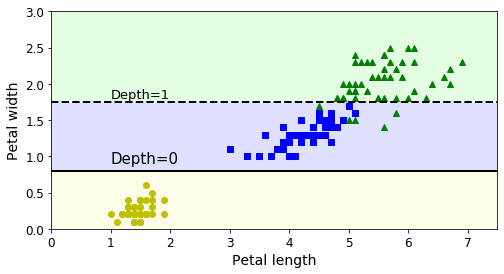

In [10]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

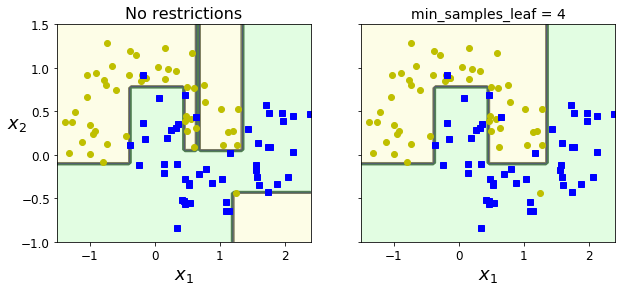

In [11]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

Plots above shows two Decision Trees trained on the moons dataset.
- On the left the Decision Tree is trained with the default hyperparameters (i.e., no restrictions), and on the right it’s trained with min_samples_leaf=4. 
- It is quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better.

## Regression Trees
- Decision Trees are also capable of performing regression tasks. Let’s build a regression tree using Scikit-Learn’s DecisionTreeRegressor class, training it on a noisy quadratic dataset with max_depth=2:

In [12]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

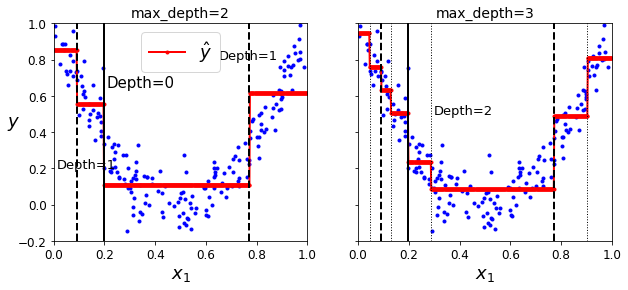

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

- If you set max_depth=3, you get the predictions represented on the right. Notice how the predicted value for each region is always the average target value of the instances in that region. 
- The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

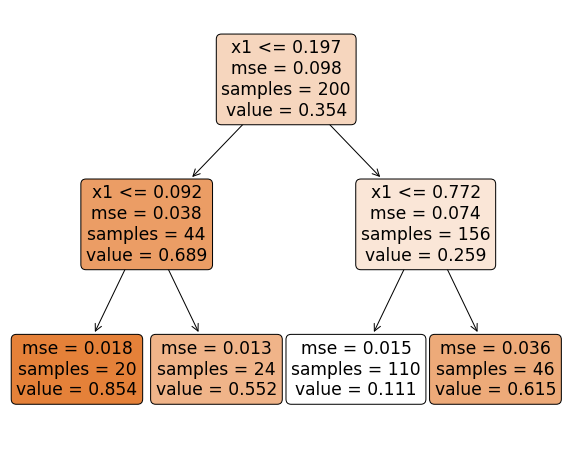

In [15]:
plt.figure(figsize=(10,8))
tree.plot_tree(tree_reg1, feature_names=["x1"], rounded=True, filled=True,)
plt.show()

- This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, it predicts a value.
    - For example, suppose you want to make a prediction for a new instance with x = 0.6. You traverse the tree starting at the root, and you eventually reach the leaf node that predicts value=0.111. 
    - This prediction is the average target value of the 110 training instances associated with this leaf node, and it results in a mean squared error equal to 0.015 over these 110 instances.

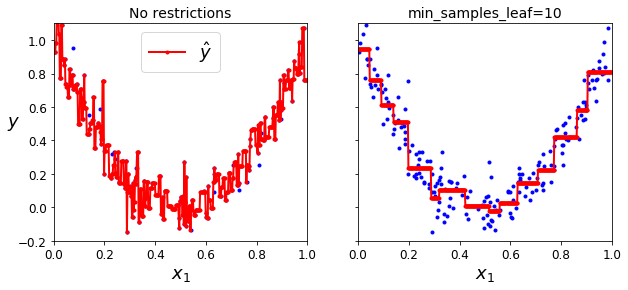

In [16]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

- Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks. 
- Without any regularization (i.e., using the default hyperparameters), you get the predictions on the left in plots above.
    - These predictions are obviously overfitting the training set very badly. 
    - Just setting min_samples_leaf=10 results in a much more reasonable model, represented on the right.

### Exercise 7. Train and fine-tune a Decision Tree for the moons dataset.
#### a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
Adding random_state=42 to make this notebook's output constant:

In [17]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

#### b. Split it into a training set and a test set using train_test_split().

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

In [19]:
from sklearn.model_selection import GridSearchCV

params = {"max_leaf_nodes": list(range(2, 100)), "min_samples_split": [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   15.3s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [20]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

#### d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.
By default, GridSearchCV trains the best model found on the whole training set (you can change this by setting refit=False), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [21]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

### Exercise 8. Grow a forest
#### a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ShuffleSplit class for this.

In [22]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

#### b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [23]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.8054499999999999

#### c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's mode() function for this). This gives you majority-vote predictions over the test set.

In [24]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [25]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

#### d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [26]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872